In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [7]:
tips = sns.load_dataset("tips")
print(type(tips))
print(tips.shape)

<class 'pandas.core.frame.DataFrame'>
(244, 7)


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
male_df = tips[tips["sex"] == "Male"]
female_df = tips[tips["sex"] == "Female"]
print("Male")
print(male_df)
print("\n\nFemale")
print(female_df)

Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]



Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Femal

In [28]:
avgMaleBill = male_df["total_bill"].mean()
avgFemaleBill = female_df["total_bill"].mean()
avgMaleTip = male_df["tip"].mean()
avgFemaleTip = female_df["tip"].mean()
ans = pd.DataFrame({"bill" : [avgMaleBill, avgFemaleBill],
                    "tip" : [avgMaleTip, avgFemaleTip]})
ans

,bill,tip
0,20.744076,3.089618
1,18.056897,2.833448


In [30]:
tips.groupby("sex")

In [33]:
obj = tips.groupby("sex")

In [35]:
groups = obj.groups
groups.keys()

dict_keys(['Male', 'Female'])

In [37]:
groups["Male"]

Int64Index([  1,   2,   3,   5,   6,   7,   8,   9,  10,  12,
            ...
            231, 232, 233, 234, 235, 236, 237, 239, 241, 242],
           dtype='int64', length=157)

In [42]:
tips.loc[tips.groupby("sex").groups["Male"]].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [51]:
for label, df in tips.groupby("sex"):
    print(label)
    print(df)
    print("\n")

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female    

In [56]:
df["size"].mode()

0    2
Name: size, dtype: int64

In [60]:
for label, df in tips.groupby("sex"):
    print(label)
    print("total_bill = ", df["total_bill"].mean())
    print("tips = ", df["tip"].mean())
    print("size = ", df["size"].mean())
    print("\n\n")

Male
total_bill =  20.744076433121034
tips =  3.0896178343949052
size =  2.6305732484076434



Female
total_bill =  18.056896551724137
tips =  2.833448275862069
size =  2.4597701149425286





In [67]:
tips.groupby("sex").agg({
    "total_bill": ["min", "max", "mean", "std"],
    "tip" : ["min", "max", "mean", "std"],
    "size" : ["min", "max", "mean", "std"]
}).T

sex                   Male     Female
total_bill min    7.250000   3.070000
           max   50.810000  44.300000
           mean  20.744076  18.056897
           std    9.246469   8.009209
tip        min    1.000000   1.000000
           max   10.000000   6.500000
           mean   3.089618   2.833448
           std    1.489102   1.159495
size       min    1.000000   1.000000
           max    6.000000   6.000000
           mean   2.630573   2.459770
           std    0.955997   0.937644

In [72]:
tips.groupby("sex")["total_bill","tip","size"].mean()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21400\406361859.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby("sex")["total_bill","tip","size"].mean()


,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [74]:
tips.groupby("sex")["total_bill","tip","size"].describe()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21400\70579680.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby("sex")["total_bill","tip","size"].describe()


total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

          tip            ...               size                                \
        count      mean  ...   75%   max  count      mean       std  min  25%   
sex                      ...                                                    
Male    157.0  3.089618  ...  3.76  10.0  157.0  2.630573  0.955997  1.0  2.0   
Female   87.0  2.833448  ...  3.50   6.5   87.0  2.459770  0.937644  1.0  2.0   

                       
        50%  75%  max  
sex                    
Male    2.0  3.0  6.0  
Female  2.0  3.0  6.0  

[2 rows x 24 columns]

In [79]:
tips.groupby(["sex","smoker"])[["total_bill", "tip"]].mean()

total_bill       tip
sex    smoker                      
Male   Yes      22.284500  3.051167
       No       19.791237  3.113402
Female Yes      17.977879  2.931515
       No       18.105185  2.773519

### Maximum footfall on which day

In [81]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [115]:
tips.groupby("day")["size"].max()

day
Thur    6
Fri     4
Sat     5
Sun     6
Name: size, dtype: int64

Maximum football is on Thursdays and Sundays.

### Busiest time of the day

In [92]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [114]:
tips.groupby("time")["size"].mean()

time
Lunch     2.411765
Dinner    2.630682
Name: size, dtype: float64

Hence Dinner is the busiest time of the day

### Do people that pay higher bills tip more?

In [118]:
sort_bill = tips.sort_values(by = "total_bill", ascending = False)
print(sort_bill[["total_bill", "tip"]].head(10))

     total_bill    tip
170       50.81  10.00
212       48.33   9.00
59        48.27   6.73
156       48.17   5.00
182       45.35   3.50
102       44.30   2.50
197       43.11   5.00
142       41.19   5.00
184       40.55   3.00
95        40.17   4.73


Yes, we can see an increasing trend of tip amounts as the total bill increases.

In [173]:
weekend_tips = tips[(tips['day'] == 'Sat') | (tips['day'] == 'Sun')]
weekend_tips

,total_bill,tip,sex,smoker,day,time,size


### analysis on the relation of total cost and number of people

In [158]:
print(tips.to_string())

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   sun  Dinner     2
1         10.34   1.66    Male     No   sun  Dinner     3
2         21.01   3.50    Male     No   sun  Dinner     3
3         23.68   3.31    Male     No   sun  Dinner     2
4         24.59   3.61  Female     No   sun  Dinner     4
5         25.29   4.71    Male     No   sun  Dinner     4
6          8.77   2.00    Male     No   sun  Dinner     2
7         26.88   3.12    Male     No   sun  Dinner     4
8         15.04   1.96    Male     No   sun  Dinner     2
9         14.78   3.23    Male     No   sun  Dinner     2
10        10.27   1.71    Male     No   sun  Dinner     2
11        35.26   5.00  Female     No   sun  Dinner     4
12        15.42   1.57    Male     No   sun  Dinner     2
13        18.43   3.00    Male     No   sun  Dinner     4
14        14.83   3.02  Female     No   sun  Dinner     2
15        21.58   3.92    Male     No   sun  Dinner     2
16        10.3

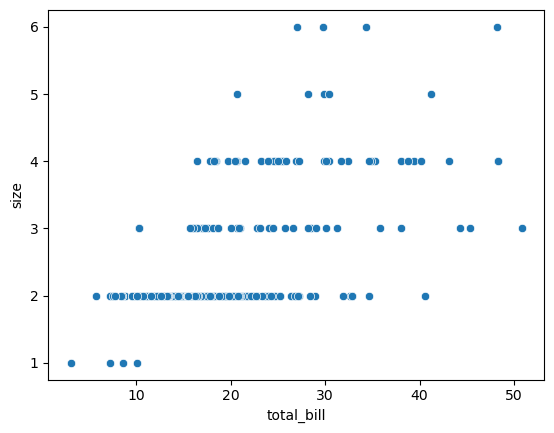

In [174]:
sns.scatterplot(data = tips, x = "total_bill", y = "size")
plt.show()

### bill to tip ratio

     total_bill   tip  tip_ratio
0         16.99  1.01   0.059447
1         10.34  1.66   0.160542
2         21.01  3.50   0.166587
3         23.68  3.31   0.139780
4         24.59  3.61   0.146808
..          ...   ...        ...
239       29.03  5.92   0.203927
240       27.18  2.00   0.073584
241       22.67  2.00   0.088222
242       17.82  1.75   0.098204
243       18.78  3.00   0.159744

[244 rows x 3 columns]


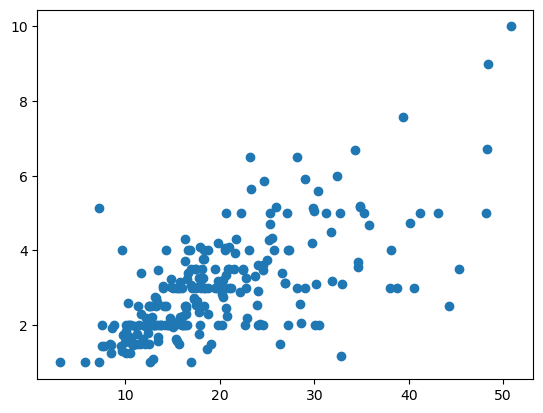

In [181]:
tips["tip_ratio"] = tips["tip"] / tips["total_bill"]
ratio_table = tips[["total_bill", "tip", "tip_ratio"]]
print(ratio_table)
plt.scatter(tips["total_bill"], tips["tip"])